# K-means clustering - Tutorial

Draft of a tutorial on K-means clustering. Text to be completed. A dataset more interesting that the Old Faithful dataset from R could be found.

K-means is an unsupervised method. The main idea is to separate the data points into K clusters. We then have two problems to solve. First, we need to find the k centroids of the k clusters. Then, we need to affect each data point to the cluster which centroid is the closest to the data point.

The algorithm is the following:

* Choose the number k of clusters
* Initialize the centers of the clusters
* Until convergence:
  - Affect each data point to its corresponding cluster
  - Compute the value of the objective function
  - Update the centers of the clusters

Import useful Python packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from math import sqrt

Set seed for reproducibility

In [2]:
random.seed(0)

Import data

Text(0.5, 1.0, 'Old Faithful dataset')

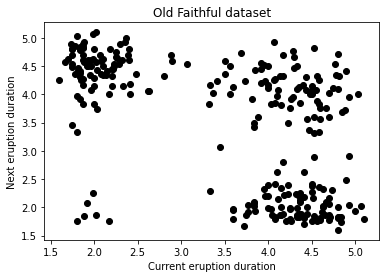

In [3]:
faithful = pd.read_csv('faithful.csv')
plt.plot(faithful['current'], faithful['next'], 'ko')
plt.xlabel('Current eruption duration')
plt.ylabel('Next eruption duration')
plt.title('Old Faithful dataset')

In [4]:
data = faithful.to_numpy()

In the following, we denote $n$ the number of data points, and $p$ the number of features for each data point.

In [5]:
n = np.shape(data)[0]
p = np.shape(data)[1]
print('We have {:d} data points, and each one has {:d} features'.format(n, p))

We have 271 data points, and each one has 2 features


Let us define a function to initialize the centroid of the clusters. We choose random points within the range of values taken by the data.

In [6]:
def init_centers(data, k):
    """
    """
    # Initialize centroids
    centers = np.zeros((k, np.shape(data)[1]))
    # Loop on k centers
    for i in range(0, k):
        # Generate p random values between 0 and 1
        dist = np.random.uniform(size=np.shape(data)[1])
        # Use the random values to generate a point within the range of values taken by the data
        centers[i, :] = np.min(data, axis=0) + (np.max(data, axis=0) - np.min(data, axis=0)) * dist
    return centers

To be able to affect each data point to the closest centroid, we need to define the distance between two data points. The most common distance is the Euclidean distance:

$d(x,y) = \sqrt{\sum_{i = 1}^p (x_i - y_i)^2}$

where $x$ and $y$ are two data observation points with $p$ variables.

We then define a function to compute the distance between each data point and each centroid.

In [7]:
def compute_distance(data, centers, k):
    """
    """
    # Initialize distance
    distance = np.zeros((np.shape(data)[0], k))
    # Loop on n data points
    for i in range(0, np.shape(data)[0]):
        # Loop on k centroids
        for j in range(0, k):
            # Compute distance
            distance[i, j] = sqrt(np.sum(np.square(data[i, :] - centers[j, :])))
    return distance

We now define a function to affect each data point to the cluster which centroid is the closest to the point. We also define an objective function that will be minimized until we reach convergence.

Our objective is to minimize the sum of the square of the distance between each point and the closest centroid:

$obj = \sum_{j = 1}^k \sum_{i = 1}^{N_j} d(x^{(i)} , x^{(j)}) ^2$

where $x^{(i)}$ is the $i^{th}$ point in the cluster $j$, $x^{(j)}$ is the centroid of the cluster $j$, and $N_j$ is the number of points in the cluster $j$.

In [8]:
def compute_objective(distance, clusters):
    """
    """
    # Initialize objective
    objective = 0.0
    # Loop on n data points
    for i in range(0, np.shape(distance)[0]):
        # Add distance to the closest centroid
        objective = objective + distance[i, int(clusters[i])] ** 2.0
    return objective

In [9]:
def compute_clusters(distance):
    """
    """
    # Initialize clusters
    clusters = np.zeros(np.shape(distance)[0])
    # Loop on n data points
    for i in range(0, np.shape(distance)[0]):
        # Find closest centroid
        best = np.argmin(distance[i, :])
        # Affect data point to corresponding cluster
        clusters[i] = best
    return clusters

After all points are affected to a cluster, compute the new location of the centroid. It is just the value of the mean of all the points affected to that cluster:

For $1 \leq j \leq k$, $x_p^{(j)} = \frac{1}{N_j} \sum_{i = 1}^{N_j} x_p^{(i)}$

In [10]:
def compute_centers(data, clusters, k):
    """
    """
    # Initialize centroids
    centers = np.zeros((k, np.shape(data)[1]))
    # Loop on clusters
    for i in range(0, k):
        # Select all data points in this cluster
        subdata = data[clusters == i, :]
        # If no data point in this cluster, generate randomly a new centroid
        if (np.shape(subdata)[0] == 0):
            centers[i, :] = init_centers(data, 1)
        else:
            # Compute the mean location of all data points in this cluster
            centers[i, :] = np.mean(subdata, axis=0)
    return centers

We can now code the K-means algorithm by assembling all these functions. We stop the computation when the objective function no longer decreases.

In [11]:
def kmeans(data, k):
    """
    """
    # Initialize centroids
    centers = init_centers(data, k)
    # Initialize objective function to maximum square of distance between to data points time number od data points
    objective_old = np.shape(data)[0] * np.sum(np.square(np.max(data, axis=0) - np.min(data, axis=0)))
    # Initialize clusters
    clusters_old = np.zeros(np.shape(data)[0])
    # Start loop until convergence
    stop_alg = False
    while stop_alg == False:
        # Compute distance between data points and centroids
        distance = compute_distance(data, centers, k)
        # Get new clusters
        clusters_new = compute_clusters(distance)
        # get new value of objective function
        objective_new = compute_objective(distance, clusters_new)
        # If objective function stops decreasing, end loop
        if objective_new >= objective_old:
            return (clusters_old, objective_old, centers)
        else:
            # Update the locations of the centroids
            centers = compute_centers(data, clusters_new, k)
            objective_old = objective_new
            clusters_old = clusters_new

Run K-means with 4 clusters

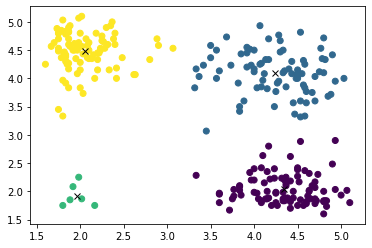

In [12]:
k = 4
(clusters, objective, centers) = kmeans(data, k)
plt.scatter(data[:,0], data[:,1], c=clusters)
plt.plot(centers[:, 0], centers[:, 1], 'kx')

The end result is very dependent on the choice of the initial centroids. Run next cells several times to see the varaitions of the clusters.

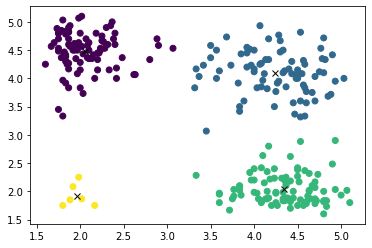

In [13]:
(clusters, objective, centers) = kmeans(data, k)
plt.scatter(data[:,0], data[:,1], c=clusters)
plt.plot(centers[:, 0], centers[:, 1], 'kx')

Result is very sensitive to the location of the initial centroid. Repeat the clustering N times and choose the clustering with the best objective function

In [14]:
def repeat_kmeans(data, k, N):
    """
    """
    # Initialization
    objective = np.zeros(N)
    clusters = np.zeros((N, np.shape(data)[0]))
    centers = np.zeros((N, k, np.shape(data)[1]))
    # Run K-means N times
    for i in range(0, N):
        result = kmeans(data, k)
        clusters[i, :] = result[0]
        objective[i] = result[1]
        centers[i, :, :] = result[2]
    # Choose the clustering with the best value of the objective function
    best = np.argmin(objective)
    return (clusters[best, :], objective[best], centers[best, :, :])

Repeat K-means 100 times

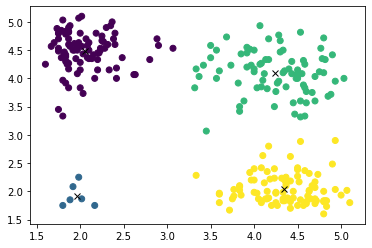

In [15]:
N = 100
(clusters, objective, centers) = repeat_kmeans(data, k, N)
plt.scatter(data[:,0], data[:,1], c=clusters)
plt.plot(centers[:, 0], centers[:, 1], 'kx')

## K-means++

Another solution to avoid the sensitivity to initial choice of centroids is using K-means++. K-means++ is another to initialize the centroids at the beginning of the algorithm. The procedure is as follows:

Define $D(x)$ the shortest distance between a data point $x$ and the centroids already defined. Then:

- Take one center $c_1$, chosen uniformly at random from all data points
- Take a new center $c_i$, choosing a data point $x$ with probability $\frac{D(x)^2}{\sum D(x)^2}
- Repeat until we have taken k centroids altogether

In [16]:
def init_centers_pp(data, k):
    """
    """
    # Initialize centroids
    centers = np.zeros((k, np.shape(data)[1]))
    # Choose randomly the first centroid
    index = int(np.shape(data)[0] * np.random.uniform(size=1)[0])
    centers[0, :] = data[index, :]
    # Initialize D
    D = np.zeros(np.shape(data)[0])
    # Loop on remaining centroids
    for i in range(0, k - 1):
        distance = compute_distance(data, centers[0 : (i + 1)], i + 1)
        for j in range(0, np.shape(data)[0]):
            # Find closest centroid
            best = np.argmin(distance[j, :])
            # Get shortest distance
            D[j] = distance[j, int(best)]
        # Cumulative distribution function
        CDF = np.cumsum(np.square(D)) / np.sum(np.square(D))
        # Get index of next centroid
        value = np.random.uniform(size=1)[0]
        for j in range(0, np.shape(data)[0]):
            if value > CDF[j]:
                centers[i + 1, :] = data[j, :]
    return centers

In [17]:
def kmeans_pp(data, k):
    """
    """
    # Initialize centroids
    centers = init_centers_pp(data, k)
    # Initialize objective function to maximum square of distance between to data points time number od data points
    objective_old = np.shape(data)[0] * np.sum(np.square(np.max(data, axis=0) - np.min(data, axis=0)))
    # Initialize clusters
    clusters_old = np.zeros(np.shape(data)[0])
    # Start loop until convergence
    stop_alg = False
    while stop_alg == False:
        # Compute distance between data points and centroids
        distance = compute_distance(data, centers, k)
        # Get new clusters
        clusters_new = compute_clusters(distance)
        # get new value of objective function
        objective_new = compute_objective(distance, clusters_new)
        # If objective function stops decreasing, end loop
        if objective_new >= objective_old:
            return (clusters_old, objective_old, centers)
        else:
            # Update the locations of the centroids
            centers = compute_centers(data, clusters_new, k)
            objective_old = objective_new
            clusters_old = clusters_new

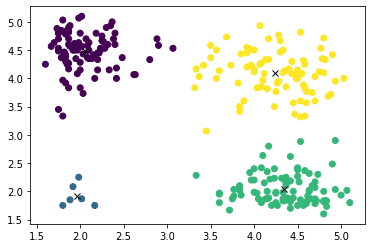

In [18]:
(clusters, objective, centers) = kmeans_pp(data, k)
plt.scatter(data[:,0], data[:,1], c=clusters)
plt.plot(centers[:, 0], centers[:, 1], 'kx')

## Choice of number of clusters

Elbow method

In [19]:
def compute_elbow(data, clusters, centers, k):
    """
    """
    E = 0
    for i in range(0, k):
        distance = compute_distance(data[clusters == i, :], centers[i, :].reshape(1, -1), 1)
        E = E + np.mean(np.square(distance))
    return E

Compute the value of E for different values of the number of clusters

In [20]:
E = np.zeros(8)
for k in range(1, 9):
    (clusters, objective, centers) = kmeans_pp(data, k)
    E[k - 1] = compute_elbow(data, clusters, centers, k)

Plot. E reaches a minimum for 4 clusters.

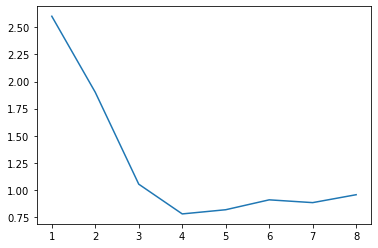

In [21]:
plt.plot(np.arange(1, 9), E)

The elbow method does not always work very well. For example, see what happens when the points get closer to each other.

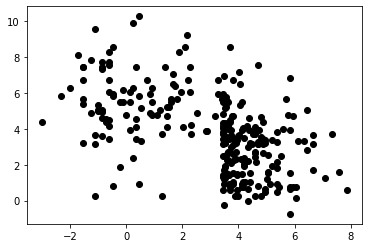

In [22]:
alpha = 3.0
m = np.mean(centers, axis=0)
data_shrink = m + np.sign(data - m) * np.power(np.abs(data - m), alpha)
plt.plot(data_shrink[:, 0], data_shrink[:, 1], 'ko')

In [23]:
E = np.zeros(8)
for k in range(1, 9):
    (clusters, objective, centers) = kmeans_pp(data_shrink, k)
    E[k - 1] = compute_elbow(data, clusters, centers, k)

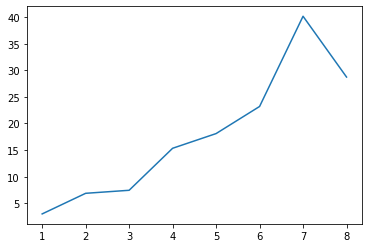

In [24]:
plt.plot(np.arange(1, 9), E)

Let us see what happens when we decrease the number of data

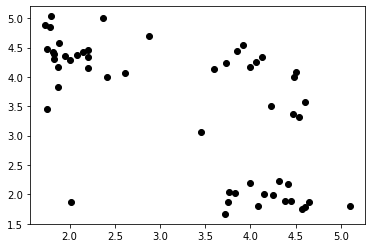

In [25]:
alpha = 0.2
indices = np.random.uniform(size=np.shape(data)[0])
subdata = data[indices < alpha, :]
plt.plot(subdata[:, 0], subdata[:, 1], 'ko')

In [26]:
E = np.zeros(8)
for k in range(1, 9):
    (clusters, objective, centers) = kmeans_pp(subdata, k)
    E[k - 1] = compute_elbow(subdata, clusters, centers, k)

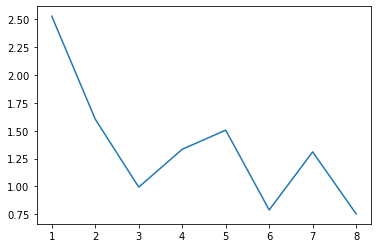

In [27]:
plt.plot(np.arange(1, 9), E)